# Bonus

🎯 You are a Data Scientist for a bank. You are asked to develop a model that is able to detect at least 90% of fraudulent transactions. Go!

👇 Load the player `creditcard.csv` dataset and display its first 5 rows.

In [1]:
import pandas as pd

data = pd.read_csv("data/creditcard.csv")

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1
1,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
2,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
3,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
4,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,0.469199,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1


ℹ️ Due to confidentiality issues, the original features have been preprocessed and renamed `V1` to `V28`. There is only one features which has not been transformed, `Amount` which is the transaction Amount. `Class` is the target and it takes value 1 in case of fraud and 0 otherwise.

# Base Logistic Regression

👇 Check class balance.

In [73]:
# YOUR CODE HERE
data['Class'].sum()

49

In [74]:
len(data['Class']) - data['Class'].sum()

28432

In [75]:
28432 + 49


28481

In [77]:
data.shape

(28481, 32)

👇 Evaluate a base `LogisticRegression` for Recall. Use model parameter `class_weight = 'balanced'` to ensure it deals with class imbalance.

In [128]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = data.drop(columns=['Amount', 'Class'])
y = data['Class']

model = LogisticRegression(class_weight='balanced', max_iter=1000)
cv_results = cross_validate(model, X, y, cv=10, scoring=['recall', 'precision', 'f1', 'accuracy','max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error'])

In [134]:
cv_results['test_r2'].mean()

-3.4024915045367705

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predicciones con el modelo. Divido al resultado en 2 outcomes
data['no_fraud'], data['fraud'] =cross_val_predict(model, X, data['Class'], cv=10, method='predict_proba').T

# precision recall 
precision, recall, threshold = precision_recall_curve(data['Class'],
                                                      data['fraud']) 

# Armo un DF con las columnas que quiero
scores = pd.DataFrame({'threshold':threshold,
                       'precision':precision[:-1],
                       'recall':recall[:-1]})
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,no_fraud,fraud
0,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,...,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1,7.298606e-13,1.000000
1,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,5.024524e-06,0.999995
2,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1,0.000000e+00,1.000000
3,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1,2.280647e-05,0.999977
4,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1,3.999432e-07,1.000000


In [162]:
scores.head()

,threshold,precision,recall
0,3.426367e-13,0.001764,1.000000
1,3.433360e-13,0.001728,0.979592
2,3.447795e-13,0.001728,0.979592
3,3.493078e-13,0.001728,0.979592
4,3.578574e-13,0.001728,0.979592


ℹ️ A default Logistic Regression model can't guarantee a 90% recall. Its decision threshold needs to be adjusted to reach such a score.

# Threshold adjustment

In [187]:
# YOUR CODE HERE
#Busco el threshold que quiero

Log_90_recall = scores[scores['recall'] >= 0.1].threshold.min()

In [222]:
scores[scores['recall'] >= 0.75].threshold.mean()

0.009575700032868095

In [223]:
model.fit(X, data['Class'])

def custom_predict(X, custom_threshold):
    probs = model.predict_proba(X) # Get likelihood of each sample being classified as 0 or 1
    fraud = probs[:, 1] # Only keep expensive likelihoods (1) 
    return (fraud > custom_threshold).astype(int)
    
custom_predict(X=X, custom_threshold=Log_90_recall)# Update predictions 



/home/bitazaratustra/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 1, 1, 1])

In [224]:
print(f"Accuracy = {cv_results['test_accuracy'].mean()}\n"
     f"Recall = {cv_results['test_recall'].mean()}\n"
      f"Precision = {cv_results['test_precision'].mean()}\n"
      f"f1 = {cv_results['test_f1'].mean()}\n"
      f"Accuracy = {cv_results['test_accuracy'].mean()}\n"
      f"Max_error = {cv_results['test_max_error'].mean()}\n"
      f"Neg_mean_absolute_error = {cv_results['test_neg_mean_absolute_error'].mean()}\n"
      f"Neg_mean_squared_error = {cv_results['test_neg_mean_squared_error'].mean()}"
     )

Accuracy = 0.992521313904741
Recall = 0.9
Precision = 0.19037357549282566
f1 = 0.30535383509211617
Accuracy = 0.992521313904741
Max_error = -1.0
Neg_mean_absolute_error = -0.00747868609525913
Neg_mean_squared_error = -0.00747868609525913


In [225]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Extract associated metrics and thresholds
fpr, tpr, thresholds = roc_curve(data['Class'], data['fraud'])

y_true = y
y_pred = model.predict(X)
# Compute AUC score
auc_score = roc_auc_score(y_true, y_pred)
auc_score

0.8979064262170822

Text(0.5, 0, 'recall')

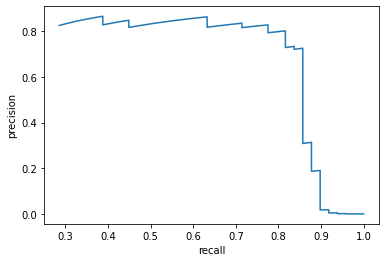

In [226]:
plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [227]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cf = confusion_matrix(y_true, y_pred)

In [228]:
plot = ConfusionMatrixDisplay(cf)

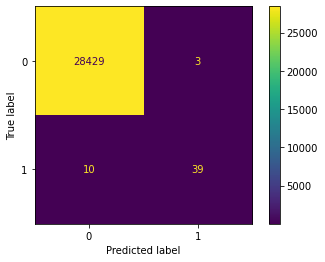

In [229]:
plot.plot()